#Import libraries

In [121]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Reading the loan prediction data

In [122]:
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')

In [123]:
data1=pd.read_csv('Train.csv')
data2=pd.read_csv('Test.csv')

In [124]:
data=pd.concat([data1, data2])
print(data1.shape, data2.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [125]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB
None


In [126]:
print(data.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [127]:
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [128]:
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


In [129]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#Check category attributes

In [130]:
cat_atrr= []
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_atrr.append(i)
cat_atrr

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [131]:
mean_item_weight = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
mean_item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [132]:
m_bool= data['Item_Weight'].isnull()
m_bool

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 14204, dtype: bool

#Filling missing values

In [133]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(), inplace=True)

#Search missing values after imputation

In [134]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#filling values that are missing with mode

In [135]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

#Searching missing values after imputation

In [136]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [137]:
sum(data['Item_Visibility']==0)

879

In [138]:
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [139]:
sum(data['Item_Visibility']==0)

0

In [140]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [141]:
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [142]:
data['New_Item_Type'] = data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['New_Item_Type'].value_counts()

New_Item_Type
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [143]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [144]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [145]:
data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [146]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [147]:
from sklearn.preprocessing import LabelEncoder
lae=LabelEncoder()
data['Outlet'] =lae.fit_transform(data['Outlet_Identifier'])
cat_atrr= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for column in cat_atrr:
    data[column]=lae.fit_transform(data[column])

In [148]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.065953,6,182.0950,OUT010,1998,732.3800,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.065953,9,53.8614,OUT013,1987,994.7052,26,1,...,False,False,True,False,True,False,False,False,False,True


In [149]:
a = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
b = data['Item_Outlet_Sales']

#Normalizing Variables

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, a, b):
    # train the model
    model.fit(a, b)
    
    # predict the training set
    pred = model.predict(a)
    
    # perform cross-validation
    cv_score = cross_val_score(model, a, b, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(b,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1154356.7845493301
CV Score: 1377406.4969376295


<Axes: title={'center': 'Model Coefficients'}>

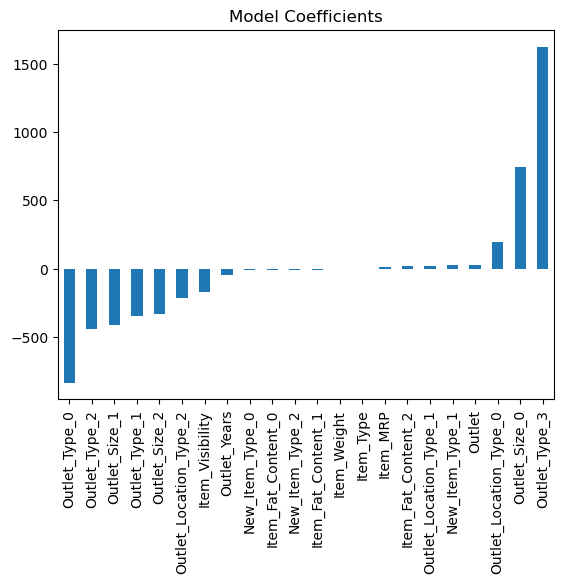

In [151]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, a, b)
coef = pd.Series(model.coef_, a.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1154376.8784310117
CV Score: 1377229.8451921134


<Axes: title={'center': 'Model Coefficients'}>

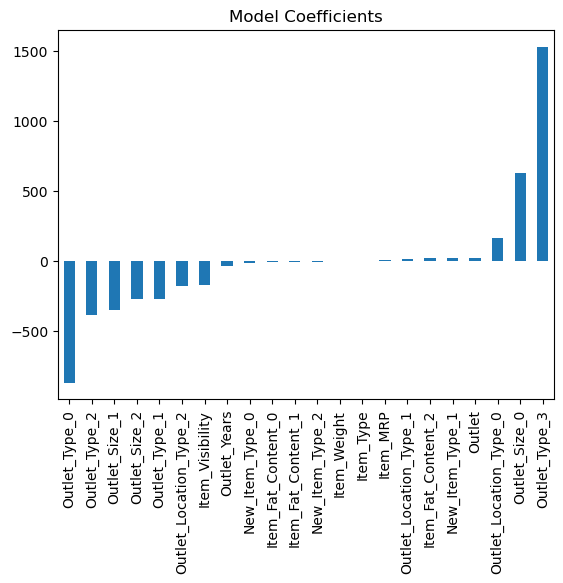

In [152]:
model = Ridge()
train(model, a, b)
coef = pd.Series(model.coef_, a.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1155342.2298227649
CV Score: 1377240.684691047


<Axes: title={'center': 'Model Coefficients'}>

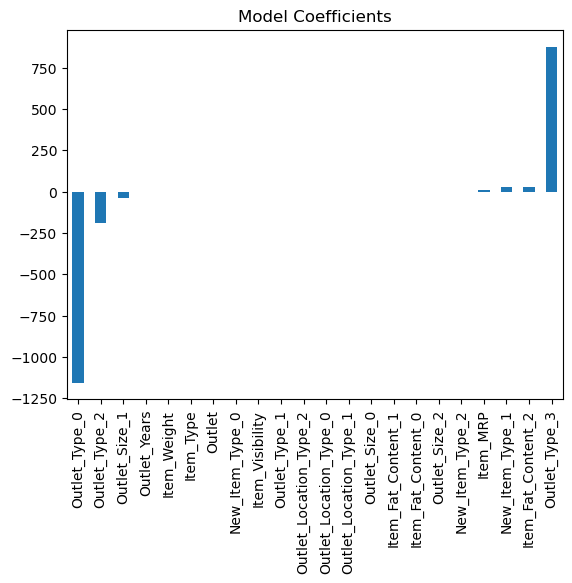

In [153]:
model = Lasso()
train(model, a, b)
coef = pd.Series(model.coef_, a.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1.3649004228887345e-27
CV Score: 2581154.8141301167


<Axes: title={'center': 'Feature Importance'}>

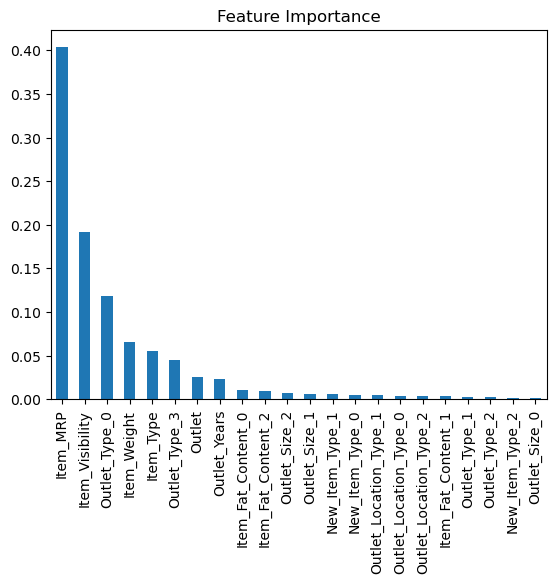

In [154]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, a, b)
coef = pd.Series(model.feature_importances_, a.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 174991.55273404077
CV Score: 1499328.1670770275


<Axes: title={'center': 'Feature Importance'}>

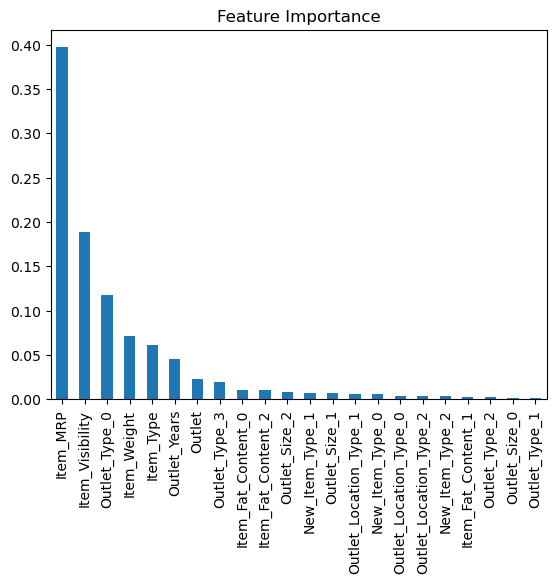

In [155]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, a, b)
coef = pd.Series(model.feature_importances_, a.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.0029613395776021353
CV Score: 1565509.6125127976


<Axes: title={'center': 'Feature Importance'}>

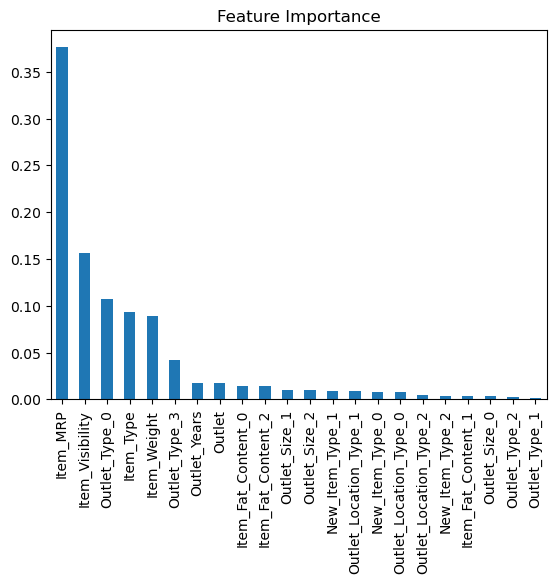

In [156]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, a, b)
coef = pd.Series(model.feature_importances_, a.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [157]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [158]:
a_Train, a_Test, b_Train, b_Test = train_test_split(a, b, test_size=0.2, random_state=42)

In [159]:
(a_Train.shape, b_Train.shape), (a_Test.shape, b_Test.shape)

(((11363, 22), (11363,)), ((2841, 22), (2841,)))

#Step2:Define architecture of model

In [160]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [161]:
!pip install tensorflow

In [162]:
import keras
print(keras.__version__)

3.3.3


In [163]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [164]:
from keras.models import Sequential

In [165]:
from keras.layers import InputLayer, Dense

In [166]:
a_Train.shape

(11363, 22)

In [167]:
a_Train.shape[1]

22

In [168]:
input_neurons = a_Train.shape[1]

In [169]:
output_neurons = 1

#first architecture

In [170]:
model = Sequential()
model.add(Dense(500, input_dim=22, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 500)                 │          11,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,701 (260.55 KB)

 Trainable params: 66,701 (260.55 KB)

 Non-trainable params: 0 (0.00 B)

#second architecture

In [171]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [172]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='relu'))

In [173]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
input_neurons*neuron_hidden_layer_1

220

In [175]:
input_neurons*neuron_hidden_layer_1 + 10

230

In [176]:
neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [177]:
neuron_hidden_layer_2*output_neurons + 1

6

In [180]:

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_history =model.fit(a_Train, b_Train, epochs=20)

Epoch 1/20


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

In [ ]:
pred_train= model.predict(a_Train)
print(np.sqrt(mean_squared_error(b_Train,pred_train)))

pred= model.predict(a_Test)
print(np.sqrt(mean_squared_error(b_Test,pred))) 

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()